# Continuous-Time Galton-Watson Processes

So far, we've been thinking about Galton-Watson Processes as evolving in generations.  Each "time-step" is a new generation.  This leads to a discrete-time setting.

However, there are many cases where we might want to model a system as evolving in time.  This is particularly true if individuals may have different life-spans, so that generations overlap in time.

We now consider a continuous-time version of the Galton-Watson process.  

As in our earlier work, we assume the population at time $t$ is made up of individuals and we denote the number by $X(t)$.  The probability that there are $\ell$ of them at time $t$ is $\mathbb{P}[X(t)=\ell] = p_\ell(t)$.  We will use 

$$
\Phi(x,t) = \sum_{\ell=0}^\infty q_\ell(t) x^\ell
$$
to be the PGF for population size at time $t$ (similarly to $\Phi_g(x)$ which was the PGF for the population size at generation $g$).

We continue to assume that individuals act independently of one another.  To keep things simple, we will assume that events happen with rates.  Individuals have a death rate $\gamma$ and create offspring at some rate $\beta$.  In general, when they create offspring they may create many offspring, or perhaps just one.  So the deaths occuring with rate $\gamma$ each reduce the population by $1$, while the births occuring with rate $\beta$ increase the population by some integer value.  New individuals or individuals who just gave birth can immediately give birth or die with rates $\beta$ and $\gamma$.




## Poisson Processes
Our assumption that events occur with rates means we are thinking of Poisson processes.  Here we give a brief discussion of the properties of Poisson processes that we will need.

```{prf:definition} Poisson Process, rate of a Poisson Process
:label: def-PoissonProcess

A **Poisson Process** can be thought of as an event that occurs with some **rate** $r$ such that the probability the event occurs in any time interval $(t, t+\Delta t)$ is $r \Delta t + \mathcal{o}(\Delta t)$, independently of all other (non-overlapping) time intervals.
```

The notation $\mathcal{o}(\Delta t)$ refers to an error that shrinks much faster than $\Delta t$:  $\mathcal{o}(\Delta t)/\Delta t \to 0$ as $\Delta t \to 0$.

In the definition above, you can reasonably think of $\mathcal{o}(\Delta t)$ as being something quadratic in $\Delta t$.  So even though $r \Delta t \to 0$ as $\Delta t \to 0$, the error term goes to $0$ much faster.  So the probability that the event happens in a time interval, divided by the length of the time interval $\mathbb{P}[\text{event}]/\Delta t = [r \Delta t + \mathcal{o}(\Delta t))/\Delta t \to r$ as $\Delta t \to 0$.  So the error term is very small compared to the leading term (which itself is quite small).[^infinitesimal]
[^infinitesimal]: This is an aside, which isn't really relevant to this subject but it's a useful way to think about the role of things like that $\mathcal{o}(\Delta t)$ term in Calculus when we define derivatives or integrals.  In Calculus we often add together a large number of very small things to get something approximately right.  As the number of things increases and their sizes decrease, we expect the total sum to converge to the correct value --- this underliies integration.  Implicitly this relies on the fact that the sizes of our $N$ objects are each approximately proportional to $1/N$ with an error term that goes to zero faster than $1/N$.  So when we add up the $N$ objects, the $N$ error terms will combine something that goes to $0$ as $N$ increases.  

```{prf:example} Poisson Processes
Poisson processes are often used as a first step towards modelling events that we can approximate as independent.  For example:

- Cars arriving at an intersection (in light traffic).
- Individuals arriving at a bus stop (assuming they don't know the timetable).
- Radio-active atoms decaying.

In the case of a single radio-active atom, once it decays the associated Poisson process stops. 
```
If we account for the fact that cars tend to drive in clumps or that individuals tend to aim to arrive at a bus stop close to the scheduled departure times, then these are not Poisson processes.


```{prf:remark} Rates are not probabilities
:label: remark-RateNeqProb

A common misconception in terminology is to use the word "probability" when meaning "rate".  They are closely related, but are not the same.  The probability shrinks as $\Delta t$ shrinks, but the rate remains the same.  They are only (almost) the same if $\Delta t= 1$ and the rate is very small.  We usually want to know what happens for $\Delta t \to 0$.
```



```{prf:theorem} Combining Poisson Processes

Consider two Poisson Process, with rates $r_1$ and $r_2$ each.  Then the next event occurs with combined rate $r_1+r_2$.  It is event $1$ with probability $r_1/(r_1+r_2)$ and event $2$ with probability $r_2/(r_1+r_2)$.  The two events cannot both occur at the same time.  

In general, if there are $N$ processes, then the combined rate is $\sum_{i=1}^n r_i$ and the probability of event $i$ is $r_i/\sum_{j=1}^N r_j$.
```

To build intuition, consider a single labelled molecule in an 1L aquarium.  Two drains are open, one with flow at rate $r_1$ (in $\mathrm{L}/\mathrm{min}$) and the other with flow at rate $r_2$ (also $\mathrm{L}/\mathrm{min}$), with fresh water added at a constant rate $r_1+r_2$ to keep the aquarium at $1L$.  The combined rate at which the molecule goes through one of the two drains is $r_1+r_2$.   Which of the two drains it passes through should be proportional to the amount flowing through them, that is their rates, and the probabilities need to sum to $1$, so it must be $r_1/(r_1+r_2)$ and $r_2/(r_1+r_2)$.  A more rigorous argument is below.

Most of the effort to prove this theorem focuses on handling the possibility that both events occur in a short time interval.  In reality if we divide time finely enough, they will not happen at the same time.  The way the proof works is to divide time into small intervals, look at the first interval where something happens and then determine the probability of each event and show that the probability of both is negligibly small.


```{prf:proof} 
To prove this rigorously, we divide time into intervals $[t_0,t_1)$, $[t_1,t_2)$, $[t_2, t_3)$, $\ldots$ where $t_{i+1}-t_i=\Delta t$, and take $\Delta t \to 0$.  Let $r_1$ and $r_2$ be the rates and $q_1 = r_1\Delta t + \mathcal{o}(\Delta t)$ and $q_2 = r_2\Delta t + \mathcal{o}(\Delta t)$ be the probabilities for each event to occur in a time interval.

The probability that only $1$ happens in a given time interval is $q_1(1-q_2)$.  The probability of only $q_2$ is $q_2(1-q_1)$.  The probability of both is $q_1q_2$.  The probability of at least one is $1-(1-q_1)(1-q_2)= q_1 + q_2 - q_1q_2$.

Substituting for $q_1$ and $q_2$, we see that the probability of at least one event in a specific time interval is $(r_1+r_2)\Delta t + \mathcal{o}(\Delta t) -r_1r_2\Delta t^2 = (r_1+r_2)\Delta t + \mathcal{o}(\Delta t)$.  This is the definition of an event having rate $r_1+r_2$.  So the two processes combine into a single process with combined rate $r_1+r_2$ (followed by another step to determine which event occurs).  

Now consider the first time interval in which something happens.  Conditional on an event happening, the probability of only event $1$ is $q_1/(q_1+q_2-q_1q_2)$.  Substituting in terms of $r_1$ and taking $\Delta t$ to be small:

\begin{align*}
\mathbb{P}[\text{only event 1}] &= \frac{r_1\Delta t + \mathcal{o}(\Delta t)}{ r_1\Delta t + \mathcal{o}(\Delta t) +  r_2\Delta t + \mathcal{o}(\Delta t) - r_1r_2 \Delta t^2 + \Delta t \mathcal{o}(\Delta t)}\\
&= \frac{r_1 + \mathcal{o}(\Delta t)/\Delta t}{ r_1 + \mathcal{o}(\Delta t)/\Delta t +  r_2 + \mathcal{o}(\Delta t)/\Delta t - r_1r_2 \Delta t + \mathcal{o}(\Delta t)}\\
& \to \frac{r_1}{r_1+r_2}  \qquad \text{as } \Delta t \to 0
\end{align*}
Similar reasoning applies to event $2$, so the probabilities of events $1$ and $2$ are $r_1/(r_1+r_2)$ and $r_2/(r_1+r_2)$.  The probability of both events in the same time interval (given that at least one occurs) is proportional to $\Delta t$ which approaches $0$ as $\Delta t \to 0$.
```


The code below simulates two Poisson processes starting at time $0$, with rates $0.2$ and $0.3$.  It steps forward in time by amounts $\Delta t$, until the first time that at least one event occurs.  It then calculates the probability of different outcomes in the time step.  These are plotted for different $\Delta t$ showing that the probabilities are as predicted.



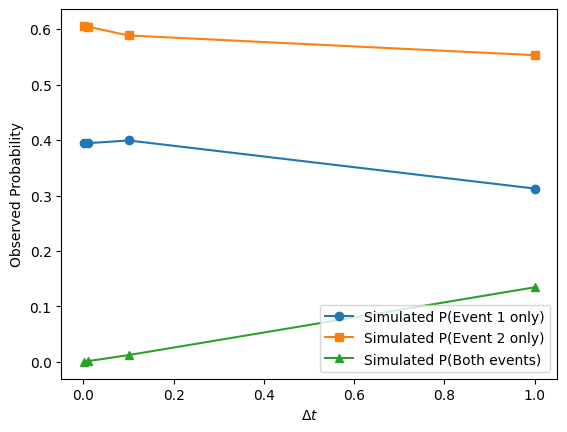

In [3]:
import numpy as np
import matplotlib.pyplot as plt
numsims = 10000


Delta_t = 1
r1 = 0.2
r2 = 0.3

Deltas = [1, 0.1, 0.01, 0.001]
simulated_p1_only = []
simulated_p2_only = []
simulated_pBoth = []

for Delta_t in Deltas:
    event1_only_count = 0
    event2_only_count = 0
    both_count = 0

    for _ in range(numsims):
        t = 0
        event1 = False
        event2 = False

        NoEvent = True
        while NoEvent:

            t += Delta_t
            p1 = r1 * Delta_t
            p2 = r2 * Delta_t
            if np.random.rand() < p1:
                event1 = True
            if np.random.rand() < p2:
                event2 = True

            if event1 and event2:
                both_count += 1
                NoEvent = False
            elif event1:
                event1_only_count += 1
                NoEvent = False
            elif event2:
                event2_only_count += 1
                NoEvent = False
    simulated_p1_only.append(event1_only_count / numsims)
    simulated_p2_only.append(event2_only_count / numsims)
    simulated_pBoth.append(both_count / numsims)


plt.plot(Deltas, simulated_p1_only, label='Simulated P(Event 1 only)', marker='o')
plt.plot(Deltas, simulated_p2_only, label='Simulated P(Event 2 only)', marker='s')
plt.plot(Deltas, simulated_pBoth, label='Simulated P(Both events)', marker='^')
plt.xlabel('$\\Delta t$')
plt.ylabel('Observed Probability')
plt.legend()
plt.show()


In fact, this will hold true for an arbitrary number of events.  


This means that rather than thinking about competing Poisson Processes each having its own rate, we can think about a single combined Poisson Process with the combined rates. When an event occurs, which event occurs is random, with probabilities equal to the individual rates divided by the combined rate.  This motivates the definition of superposition of Poisson processes (**It's very embarrasing, but I mixed terminology when I wrote these notes --- what I called a *compound Poisson process* is actually a *superposition of Poisson processes*.**).

```{prf:definition} Superposition of Poisson Processes
Given a set of Poisson processes with rates $r_1, r_2, \ldots$ happening at the same time, the **Superposition of the Poisson Processes**, is itself a Poisson process with rate $r = \sum r_i$.  When an event occurs with the superposition process, the probability it is event $i$ is $r_i/r$.
```



An interesting and important question is how long does it take until an event happens?  For this it is sufficient to consider a single Poisson process.

```{prf:theorem} Survival Probability
:label: theorem-Survival

If an event occurs with rate $r$, the probability it has not happened after waiting a time $t$ is $e^{-rt}$.
```

```{prf:proof}
Assume time is initially $0$.  Divide the interval from $0$ to $t$ into $N$ intervals of length $\Delta t = t/N$.  The probability that the event does not occur in each interval is $(1- rt/N + \mathcal{o}(t/N))$.  Thus the probability it has not occured by time $t$ is  

\begin{align*}
\mathbb{P}[\text{event not occured by time }t] &= \left(1- \frac{rt}{N} + \mathcal{o}(1/N)\right)^N\\
& \to \left(1 -\frac{rt}{N}\right)^N + N\left(1-\frac{rt}{N}\right)^{N-1}\mathcal{o}(1/N)+ \cdots\\
& \to e^{-rt}
\end{align*}
as $N \to \infty$.
where we used $(1+c/N)^N \to e^{-c}$ and $N\times \mathcal{o}(1/N) \to 0$ as $N \to \infty$.
```

Since the superposition of Poisson processes is itself a Poisson proces, this result applies to superpositions of Poisson processes as well.

### Self-test

1. The probability that a Poisson process does not occur in the time interval $[0,t)$ is $e^{-rt}$.  

   **(a)** Taking $t = \Delta t$, verify that the probability it occurs at least once in a short time interval is $r \Delta t + \mathcal{o}(\Delta t)$ (use Taylor Series for $1-e^{-rt}$ and explain why $1-e^{-rt}$ is appropriate).

   **(b)** The simulation above assumed that the probability it occurs in an interval is $r \Delta t$.  Update the code to use $1-e^{-rt}$ (which can be entered as `1 - np.exp(-r*t)`).  Verify that the same limits still occur as $\Delta t \to 0$

2. Our goal in this question is to understand why the word "Poisson" appears in the name of a Poisson process, and to understand why an alternate definition of a Poisson process with rate $r$ is that the number of events to occur in a time-interval of duration $T$ is Poisson distributed with mean $rT$.  Consider an event with rate $r$, and assume that it can occur repeatedly (i.e., even if it just happened it can happen again as soon as the next time step).  For our purposes, an individual giving birth is an example (but a specific individual dying is not).  Consider the time interval $[0,T)$

   **(a)** Divide the interval into $N$ sub-intervals of length $\Delta t=T/N$, assuming that $N$ is large enough that the probability any of the $N$ intervals have 2 events in them is approximately $0$, and the probability of one event in a time interval is approximately $r \Delta t$.  Find the PGF for the number of events to occur ($N$ should appear in your expression).  (hint - review the PGF for the number of heads in $N$ coin flips)

   **(b)** The approximations in (a) become more accurate as $N \to \infty$.  Show that as $N \to \infty$, the PGF approaches the PGF for a Poisson distribution with mean $r T$.  

3. Revisit the proof that the survival function is $e^{-rt}$.  Taking $\Delta t$ to be a small time step and treating the probability that the event occurs in a time step as $r\Delta t$ (so ignoring the $\mathcal{o}(\Delta t)$ terms):

   **(a)** Explain why the number of intervals until the first event occurs has a Geometric Distribution and find its PGF.

   **(b)** Using the PGF, find the average number of intervals (of length $\Delta t$) until the first event, and thus find the average amount of time until the start of the interval in which the first event occurs.

   **(c)** Taking $\Delta t \to 0$, find the average time until the first event.

